2021-12-14	 <br/>
Spice Girls <br/>
https://github.com/rfordatascience/tidytuesday/blob/master/data/2021/2021-12-14/readme.md

Radial Chart - Completed <br/>
Multiple charts on one plot - Completed <br/>
Dropdown menu- Completed  

https://www.geeksforgeeks.org/how-to-make-dropdown-menus-in-plotly/ 

In [1]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.renderers.default='jupyterlab'
import os

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-12-14/studio_album_tracks.csv')

In [3]:
df.head()

,artist_name,artist_id,album_id,album_release_date,album_release_year,danceability,energy,key,loudness,mode,...,tempo,track_id,time_signature,duration_ms,track_name,track_number,album_name,key_name,mode_name,key_mode
0,Spice Girls,0uq5PttqEjj3IH1bzwcrXF,4jbWZmf7kRxCBD6tgVepYh,2000-01-01,2000,0.769,0.819,10,-3.941,0,...,109.998,1NwDWbpg9dPH12xBd2ibrv,4,255866,Holler,1,Forever,A#,minor,A# minor
1,Spice Girls,0uq5PttqEjj3IH1bzwcrXF,4jbWZmf7kRxCBD6tgVepYh,2000-01-01,2000,0.829,0.764,5,-3.776,0,...,104.000,0r5d5LmhLQwJVEw0kTEExp,4,254666,Tell Me Why,2,Forever,F,minor,F minor
2,Spice Girls,0uq5PttqEjj3IH1bzwcrXF,4jbWZmf7kRxCBD6tgVepYh,2000-01-01,2000,0.614,0.788,11,-5.547,1,...,116.029,5EE1Uzg0JvtBhs6TRs33R0,4,298293,Let Love Lead The Way,3,Forever,B,major,B major
3,Spice Girls,0uq5PttqEjj3IH1bzwcrXF,4jbWZmf7kRxCBD6tgVepYh,2000-01-01,2000,0.736,0.779,8,-5.163,1,...,101.023,2O8kqbUJS1vkL3x9mF7WzM,4,251000,Right Back At Ya,4,Forever,G#,major,G# major
4,Spice Girls,0uq5PttqEjj3IH1bzwcrXF,4jbWZmf7kRxCBD6tgVepYh,2000-01-01,2000,0.860,0.710,1,-4.214,0,...,110.002,7xzDDFO7L1o5ANyzOYbbWZ,4,226266,Get Down With Me,5,Forever,C#,minor,C# minor


In [4]:
df.columns

Index(['artist_name', 'artist_id', 'album_id', 'album_release_date',
       'album_release_year', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'track_id', 'time_signature', 'duration_ms',
       'track_name', 'track_number', 'album_name', 'key_name', 'mode_name',
       'key_mode'],
      dtype='object')

In [5]:
df_groups=df.groupby(['album_name'])['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo'].mean()

d:\Users\DComputer\Desktop\learning\Streamlined EDA and ML\project_env\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [6]:
df_groups.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'],
      dtype='object')

In [7]:
df_groups.iloc[0]

danceability          0.695000
energy                0.722455
key                   5.727273
loudness             -4.360000
mode                  0.545455
speechiness           0.035273
acousticness          0.153490
instrumentalness      0.001604
liveness              0.145391
valence               0.583127
tempo               105.105455
Name: Forever, dtype: float64

In [8]:
df_groups.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
album_name,,,,,,,,,,,
Forever,0.6950,0.722455,5.727273,-4.3600,0.545455,0.035273,0.153490,0.001604,0.145391,0.583127,105.105455
Spice,0.6938,0.731200,5.700000,-7.8084,0.500000,0.048260,0.099769,0.145929,0.167320,0.755600,113.887500
Spiceworld,0.5702,0.776500,6.100000,-5.9744,0.600000,0.050640,0.148524,0.029873,0.191430,0.641900,126.203000


In [9]:
# Normazing the data using Min-Max scaling - Not required to use sklearn for a small data 

df_normailized= (df_groups - df_groups.min()) / (df_groups.max() - df_groups.min())

In [10]:
df_normailized2 = df_groups.iloc[:,1:].apply(lambda x: (x-x.mean())/ x.std(), axis=0)

In [11]:
df_normailized2

,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
album_name,,,,,,,,,,
Forever,-0.721486,-0.515257,0.978112,-0.060523,-1.142688,0.658968,-0.752213,-0.983842,-0.879107,-0.939789
Spice,-0.420022,-0.637292,-1.020538,-0.968364,0.427473,-1.150654,1.134811,-0.031569,1.087919,-0.111136
Spiceworld,1.141508,1.152549,0.042426,1.028887,0.715215,0.491686,-0.382598,1.015411,-0.208812,1.050926


In [12]:
# Had to cheat a little. There was no way for the fill the 0 values.
df_normailized=df_normailized+1

In [13]:
import plotly.graph_objects as go

categories = df_normailized.columns

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=df_normailized.iloc[0],
      theta=categories,
      fill='toself',
      name='Product A'
))
fig.add_trace(go.Scatterpolar(
      r=df_normailized.iloc[1],
      theta=categories,
      fill='toself',
      name='Product B'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 2]
    )),
  showlegend=False
)

fig.show()

In [14]:
df_normailized

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
album_name,,,,,,,,,,,
Forever,2.000000,1.000000,1.068182,2.000000,1.454545,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000
Spice,1.990385,1.161817,1.000000,1.000000,1.000000,1.845125,1.000000,2.000000,1.476315,2.000000,1.416259
Spiceworld,1.000000,2.000000,2.000000,1.531841,2.000000,2.000000,1.907559,1.195872,2.000000,1.340765,2.000000


In [16]:
# Using the Radial / Polar chart
   
plot = go.Figure(data=[go.Scatterpolar(
      r=df_normailized.iloc[0],
      theta=categories,
      fill='toself',
      name='Forever' 
),
go.Scatterpolar(
      r=df_normailized.iloc[1],
      theta=categories,
      fill='toself',
      name='Spice'
),
go.Scatterpolar(
      r=df_normailized.iloc[2],
      theta=categories,
      fill='toself',
      name='Spiceworld'
)
])
  
  
# Add dropdown
plot.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=list([
                dict(label="All Three",
                     method="update",
                     args=[{"visible": [True, True, True]},
                           {"title": "How Spicy were the Spice Girl Albums - All",
                           }]),
                dict(label="Forever",
                     method="update",
                     args=[{"visible": [True, False, False]},
                           {"title": "How Spicy were the Spice Girl Albums - Forever",
                            }]),
                dict(label="Spice",
                     method="update",
                     args=[{"visible": [False, True, False]},
                           {"title": "How Spicy were the Spice Girl Albums - Spice",
                            }]),
                dict(label="Spiceworld",
                     method="update",
                     args=[{"visible": [False, False, True]},
                           {"title": "How Spicy were the Spice Girl Albums - Spiceworld",
                            }]), 
            ]),
        )
    ])
  
plot.show()

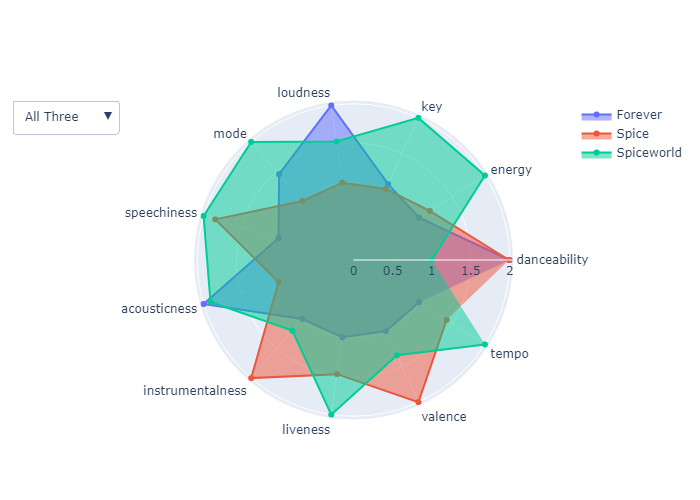

In [17]:
# Display Output in production
img_bytes = plot.to_image(format="png")
from IPython.display import Image
Image(img_bytes)
